In [131]:
# Loading data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.cluster import KMeans

In [133]:
#Loading the data
filename = "/content/Date_Fruit_Datasets.xlsx"
df= pd.read_excel(filename)
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


There are no unnessary columns or rows to delete. All  are also continuous, so I do not hope to take out an outliers as they may be indicative of something else, such as a deformity in the date. 

Identified and addressed missing values 

In [57]:
#Checking for duplicates while counting the rows that it is duplicating from, but no duplicates!
df.duplicated(keep=False).sum()

0

In [ ]:
#No missing data!
null_vals = df.isna().sum()
null_vals

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

In [134]:
df["Class"].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

The way the classes were entered in this dataset makes me believe data collection went very well since all items seemed to fit in with the ones that are supposed to exist. 

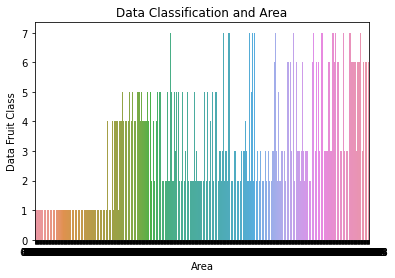

In [17]:
sns.barplot(data=df, y="Class", x= "AREA")
plt.xlabel('Area')
plt.ylabel('Data Fruit Class')
plt.title('Data Classification and Area');

In [ ]:
sns.barplot(data=df, y="Class", x= "AREA")
plt.xlabel('Area')
plt.ylabel('Data Fruit Class')
plt.title('Data Classification and Area');

This above graph is interesting because when data was collected, it was thought that if there was a variation of areas for each class of dates, that using the area to predict the type of date would be easier! In this case, I do see some variation, so it may be helpful to run further analyses to explore this relationship. 

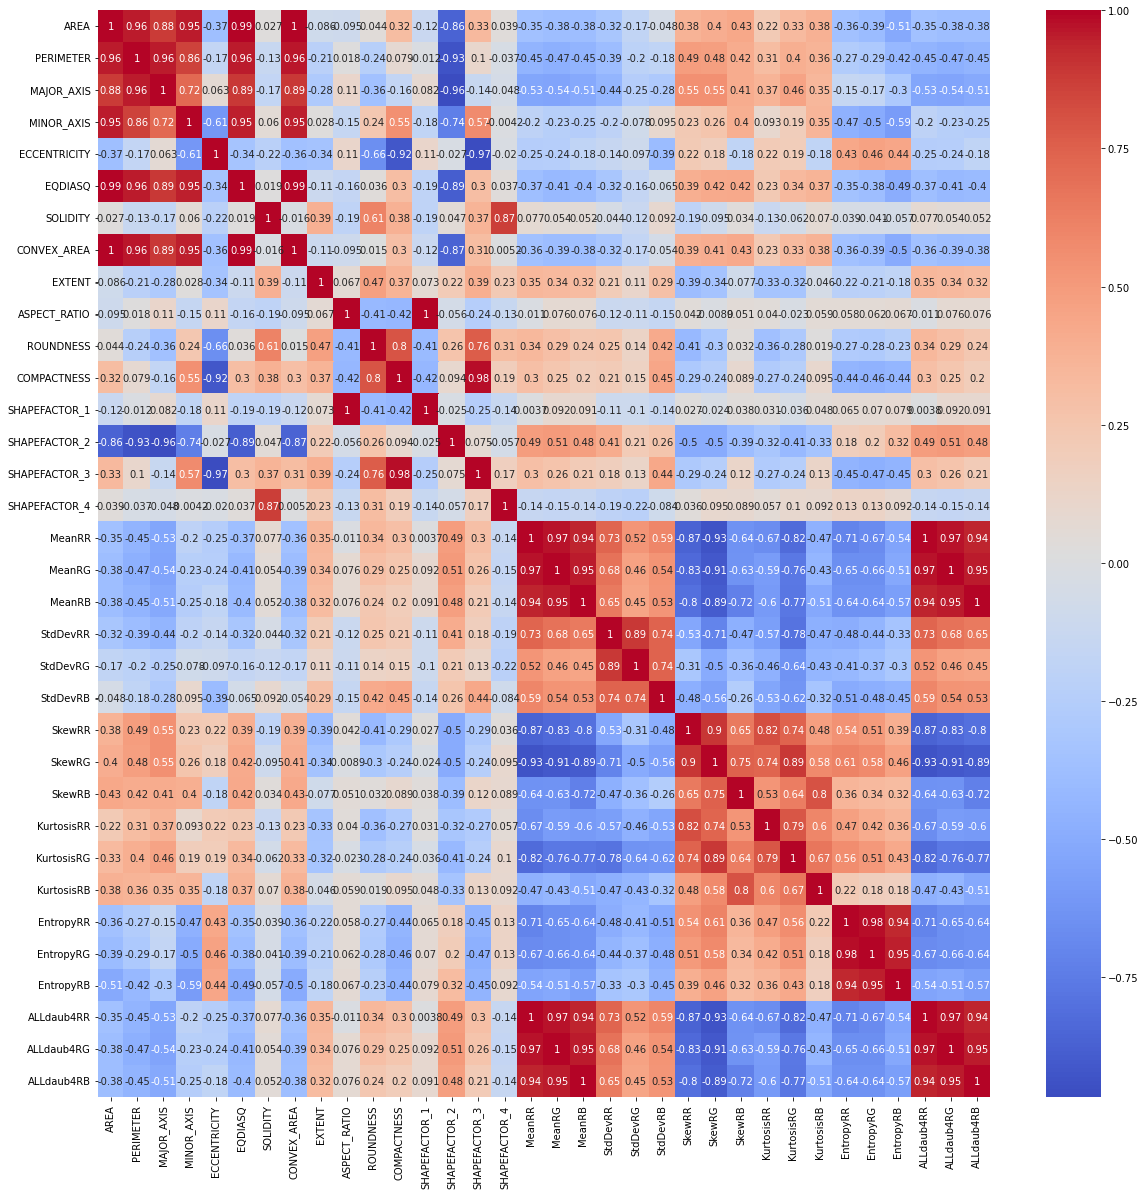

In [5]:
corr = df.corr()
corr
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', annot=True)

This above graph is very interesting as it shows that there are some physical aspects of dates that are highly correlated, such as the permimeter and area, as opposed to the texture and solidity that are non-physical characteristics.

In [6]:
# Define target column
df['Class'] = df['Class'].map({'DOKOL': 1, 'SAFAVI': 2,'ROTANA': 3, 'DEGLET': 4, 'SOGAY': 5, 'IRAQI': 6, 'BERHI': 7})

In [7]:
df1 = df[['EntropyRR', 'PERIMETER']]
df1.head()

,EntropyRR,PERIMETER
0,-59191263232,2378.908
1,-34233065472,2085.144
2,-93948354560,2647.394
3,-32074307584,2351.210
4,-39980974080,2160.354


In [135]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df1)

In [136]:
# Instantiate & fit clustering - this is done in one step for DBSCAN
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)

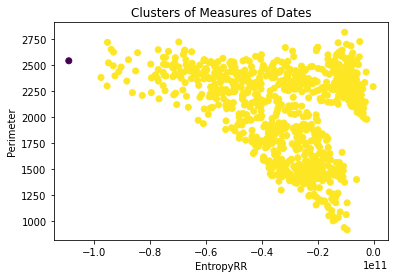

In [10]:
# Save the cluster lables to the dataframe 
df['cluster'] = dbs.labels_
# Visualize the clusters
plt.scatter(df['EntropyRR'], df['PERIMETER'], c = df['cluster'])
plt.xlabel('EntropyRR')
plt.ylabel('Perimeter')
plt.title('Clusters of Measures of Dates');

This is interesting as I can see the DBSCAN algorithm only chose one cluster. The purple point in the graph above is considered noise and is not included as part of a cluster. I think this visualization suggests that there could be such a strong association between the area and perimeter of a date, that the algorithm doesn't break them into different clusters. 

Let me try a different visalization now: 

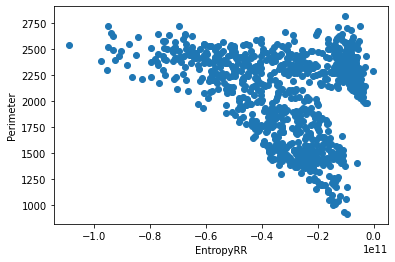

In [11]:
# Visualize data
plt.scatter(df1['EntropyRR'], df['PERIMETER'])
plt.xlabel('EntropyRR')
plt.ylabel('Perimeter');

In [20]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(n_clusters=2)

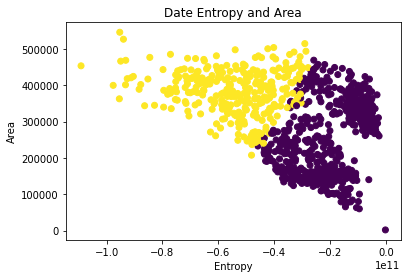

In [21]:
# Save the cluster labels to the dataframe 
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['EntropyRR'], df['AREA'], c = df['cluster'])
plt.xlabel('Entropy')
plt.ylabel('Area')
plt.title('Date Entropy and Area');

This could be an interesting visualization as the cut off between the two clusters seems to start as the dimishing returns begins. This also encourages me to look at other factors related to date fruits, such as whether low perimeter could still mean a date has high denisity. 